In [1]:
%matplotlib inline
import os,sys,random

from parabola import ParabolicRegion as Parabola
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from igmm import IGMM, DynamicParameter

In [2]:
def get_random_motor_set(system, n_samples):
    n_motor = system.n_motor
    raw_rnd_data = np.random.random((n_samples, n_motor))

    min_values = system.min_motor_values
    max_values = system.max_motor_values

    min_values = np.array(n_samples * [np.array(min_values)])
    max_values = np.array(n_samples * [np.array(max_values)])
    motor_commands = min_values + raw_rnd_data * (max_values - min_values)
    return motor_commands

def load_h5(file_name, system=None):
    # Keeping support to old datamanager files
    motor = pd.read_hdf(file_name, 'motor').as_matrix()
    sensor = pd.read_hdf(file_name, 'sensor').as_matrix()
    return motor, sensor

def evaluate_model(system, model, sensor_evaluation, axes=None):
    if axes is not None:
        plt.sca(axes)
        plt.hold(True)
    n_samples = sensor_evaluation.shape[0]
    x_dims = range(system.n_motor)
    y_dims = range(system.n_motor,system.n_motor+system.n_sensor)
    total_norm_error = 0.
    for i in range(n_samples):
        action = model.infer(x_dims,
                             y_dims,
                            sensor_evaluation[i,:])
        system.set_action(action)
        system.executeMotorCommand()
        if axes is not None:
            plt.scatter(sensor_evaluation[i,0],sensor_evaluation[i,1], marker = 'o', s = 3., color = 'b')
            plt.scatter(system.sensor_out[0],system.sensor_out[1],marker = 'x', s = 12., color = 'r')
        total_norm_error += np.linalg.norm(sensor_evaluation[i,:]-system.sensor_out)
    return total_norm_error/float(n_samples)

In [3]:
batch_size = 100
n_batches = 162

np.random.seed(124365)

0.2
0.198285288082
0.196585277348
0.194899841758
0.193228856351
0.191572197236
0.189929741587
0.18830136763
0.186686954633
0.185086382903
0.18349953377
0.181926289582
0.180366533697
0.178820150472
0.177287025256
0.175767044381
0.174260095151
0.172766065841
0.171284845681
0.169816324849
0.168360394469
0.166916946594
0.165485874205
0.164067071202
0.16266043239
0.16126585348
0.159883231075
0.158512462666
0.157153446621
0.155806082181
0.154470269451
0.153145909391
0.151832903811
0.150531155362
0.149240567531
0.147961044632
0.146692491799
0.145434814979
0.144187920926
0.142951717194
0.141726112128
0.14051101486
0.139306335301
0.138111984134
0.136927872808
0.135753913531
0.134590019263
0.133436103713
0.132292081326
0.131157867283
0.130033377492
0.128918528582
0.127813237895
0.126717423483
0.125631004101
0.124553899201
0.123486028924
0.122427314097
0.121377676224
0.120337037484
0.119305320722
0.118282449445
0.117268347816
0.116262940648
0.115266153398
0.114277912163
0.113298143673
0.112326775

c:\python27\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
c:\python27\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
c:\python27\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
c:\python27\lib\site-packages\ipykernel_launcher.py:53: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
c:\python27\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior

0.2
0.198285288082
0.196585277348
0.194899841758
0.193228856351
0.191572197236
0.189929741587
0.18830136763
0.186686954633
0.185086382903
0.18349953377
0.181926289582
0.180366533697
0.178820150472
0.177287025256
0.175767044381
0.174260095151
0.172766065841
0.171284845681
0.169816324849
0.168360394469
0.166916946594
0.165485874205
0.164067071202
0.16266043239
0.16126585348
0.159883231075
0.158512462666
0.157153446621
0.155806082181
0.154470269451
0.153145909391
0.151832903811
0.150531155362
0.149240567531
0.147961044632
0.146692491799
0.145434814979
0.144187920926
0.142951717194
0.141726112128
0.14051101486
0.139306335301
0.138111984134
0.136927872808
0.135753913531
0.134590019263
0.133436103713
0.132292081326
0.131157867283
0.130033377492
0.128918528582
0.127813237895
0.126717423483
0.125631004101
0.124553899201
0.123486028924
0.122427314097
0.121377676224
0.120337037484
0.119305320722
0.118282449445
0.117268347816
0.116262940648
0.115266153398
0.114277912163
0.113298143673
0.112326775

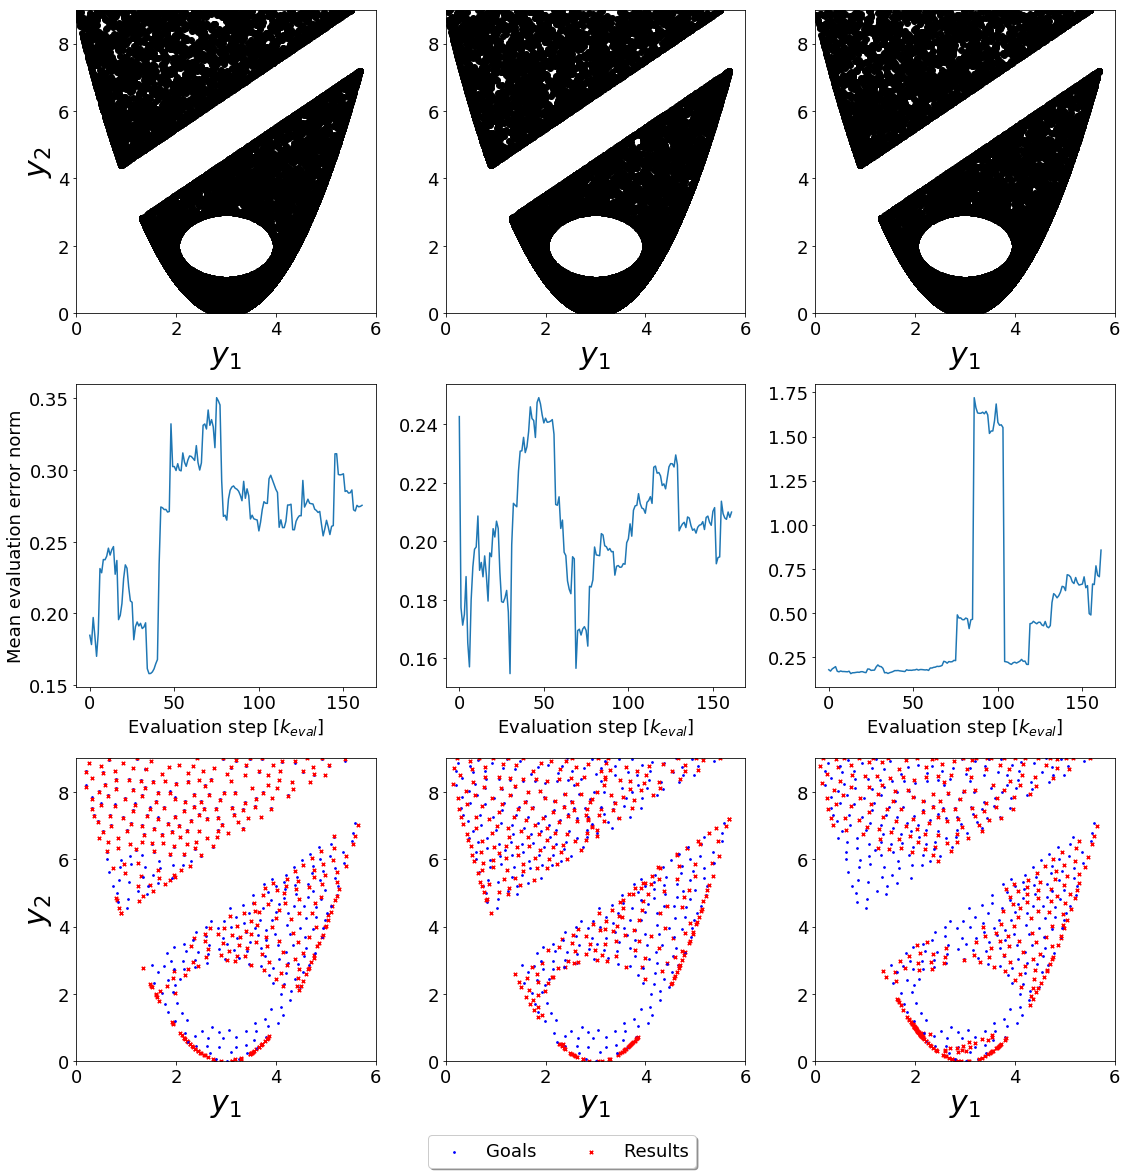

In [4]:
# Results Container
matplotlib.rcParams['figure.figsize'] = (16.0, 16.0)
matplotlib.rcParams.update({'font.size': 18})
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'size':'30'}

fig1,ax1 = plt.subplots(3,3)

for ii in range(3):
    ### System and Model
    system = Parabola()
    model = IGMM(min_components=3,
                 max_step_components=5,
                 max_components=20,
                 forgetting_factor=DynamicParameter(**{'function':'log',
                                                       'init':0.2,
                                                       'end':0.05,
                                                       'steps':n_batches}))

    motor_evaluation, sensor_evaluation = load_h5('../parabola_dataset_2.h5')

    ### Train
    eval_evo = np.zeros((n_batches,))
    train_data_w = []
    for i in range(n_batches):
        motor_data = get_random_motor_set(system, batch_size)
        sensor_data = np.zeros((batch_size,system.n_sensor))
        for j in range(batch_size):
            system.set_action(motor_data[j,:])
            system.executeMotorCommand()
            sensor_data[j,:] = system.sensor_out
        train_data = np.concatenate((motor_data,sensor_data), axis=1)
        model.train(train_data)
        eval_evo[i] = evaluate_model(system, model, sensor_evaluation)
        train_data_w += [sensor_data]

    ### Plot
    plt.sca(ax1[0,ii])
    plt.hold(True)
    for batch in train_data_w:
        plt.scatter(batch[:,0],batch[:,1], marker = 'o', color = 'k')
    ax1[0,ii].set_xlim([0,6])
    ax1[0,ii].set_ylim([0,9])

    plt.xlabel('$y_1$',**axis_font)

    plt.sca(ax1[1,ii])
    plt.plot(eval_evo)
    plt.xlabel('Evaluation step [$k_{eval}$]')

    plt.sca(ax1[2,ii])
    plt.hold(True)
    evaluate_model(system, model, sensor_evaluation,axes=ax1[2,ii])
    plt.xlabel('$y_1$',**axis_font)

    ax1[2,ii].set_xlim([0,6])
    ax1[2,ii].set_ylim([0,9])

plt.sca(ax1[0,0])
plt.ylabel('$y_2$',**axis_font)
plt.sca(ax1[1,0])
plt.ylabel('Mean evaluation error norm')
plt.sca(ax1[2,0])
plt.ylabel('$y_2$',**axis_font)
lgd = plt.legend(['Goals','Results'],\
                 ncol=2,loc='lower right', fontsize=18, bbox_to_anchor=(2.1, -0.38),
                 fancybox=True, shadow=True)
fig1.tight_layout(h_pad=0.5)

In [9]:
# fig1.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/2017 CCIA Regression Problem with IGMM/images/reg.eps',\
#             format='eps', dpi=1000, transparent=True, bbox_extra_artists=(lgd,), bbox_inches='tight')